In [207]:
import pandas as pd 
import numpy as np 
import seaborn as sns; sns.set()

In [208]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

y = train.Transported
train.drop("Transported", inplace=True, axis = 1)

y = y.astype(int)

In [209]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [210]:


train["RoomService"] = train["RoomService"].fillna(0)
train["FoodCourt"] = train["FoodCourt"].fillna(0)
train["ShoppingMall"] = train["ShoppingMall"].fillna(0)
train["Spa"] = train["Spa"].fillna(0)
train["VRDeck"] = train["VRDeck"].fillna(0)

test["RoomService"] = test["RoomService"].fillna(0)
test["FoodCourt"] = test["FoodCourt"].fillna(0)
test["ShoppingMall"] = test["ShoppingMall"].fillna(0)
test["Spa"] = test["Spa"].fillna(0)
test["VRDeck"] = test["VRDeck"].fillna(0)


train["Spent"] = train.RoomService + train.FoodCourt + train.ShoppingMall + train.Spa + train.VRDeck
test["Spent"] = test.RoomService + test.FoodCourt + test.ShoppingMall + test.Spa + test.VRDeck



# EDA

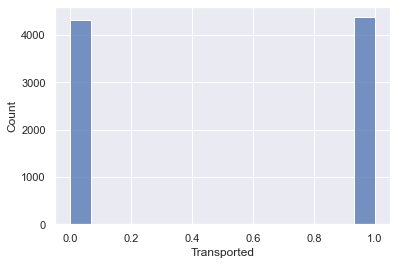

In [211]:
sns.histplot(data = y, x = y);

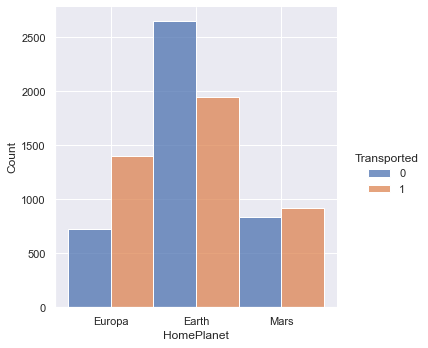

In [212]:
sns.displot(data = train, x = train.HomePlanet, hue = y, multiple="dodge");

# HomePlanet affects transported

In [213]:
train.HomePlanet.value_counts(dropna=False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [214]:
train.HomePlanet = train.HomePlanet.fillna(train.HomePlanet.mode().iloc[0])
test.HomePlanet = test.HomePlanet.fillna(test.HomePlanet.mode().iloc[0])

In [215]:
train.CryoSleep.value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [216]:
train.CryoSleep = train.CryoSleep.astype(float)
train.CryoSleep = train.CryoSleep.fillna(train.CryoSleep.mode().iloc[0])

test.CryoSleep = test.CryoSleep.astype(float)
test.CryoSleep = test.CryoSleep.fillna(test.CryoSleep.mode().iloc[0])

In [217]:
# Cabin: Deck, num, side

train["Deck"] = train.Cabin.str.split("/").str[0]
train["Deck"] = train["Deck"].fillna(train["Deck"].mode().iloc[0])

test["Deck"] = test.Cabin.str.split("/").str[0]
test["Deck"] = test["Deck"].fillna(test["Deck"].mode().iloc[0])


train["Cabinnumber"] = train.Cabin.str.split("/").str[1]
#train["Cabinnumber"] = train.Cabinnumber.fillna(train["Cabinnumber"].mode().iloc[0])

test["Cabinnumber"] = test.Cabin.str.split("/").str[1]
#test["Cabinnumber"] = test.Cabinnumber.fillna(test["Cabinnumber"].mode().iloc[0])


train["Side"] = train.Cabin.str.split("/").str[2]
train["Side"] = train["Side"].fillna(train["Side"].mode().iloc[0])


test["Side"] = test.Cabin.str.split("/").str[2]
test["Side"] = test["Side"].fillna(test["Side"].mode().iloc[0])


In [218]:
train.Side.value_counts(dropna=False)

S    4487
P    4206
Name: Side, dtype: int64

In [219]:
train.Destination.value_counts(dropna=False)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: Destination, dtype: int64

In [220]:
train.Destination = train.Destination.fillna(train.Destination.mode().iloc[0])
test.Destination = test.Destination.fillna(test.Destination.mode().iloc[0])

In [221]:
train.Age.isna().sum()

179

In [222]:
train.Age = train.Age.fillna(train.Age.mean())

test.Age = test.Age.fillna(test.Age.mean())

In [223]:
train.VIP = train.VIP.astype(float)
train.VIP.value_counts(dropna=False)

test.VIP = test.VIP.astype(float)

In [224]:
train.VIP = train.VIP.fillna(train.VIP.mode().iloc[0])

test.VIP = test.VIP.fillna(test.VIP.mode().iloc[0])

In [225]:
test.Spent.isna().sum()

0

In [226]:
train.drop("Name", axis = 1, inplace=True)
test.drop("Name", axis = 1, inplace=True)

In [227]:
# Create Group variable
train["Group"] = train.PassengerId.str.split("_").str[0]
test["Group"] = test.PassengerId.str.split("_").str[0]

In [228]:
train.Group.isna().sum()

0

In [229]:
num = ["Age", "Spent"]
cat = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Deck", "Side", "Group"]

# Modelling

In [230]:
from sklearn.ensemble import RandomForestClassifier


model_randomforst = RandomForestClassifier(n_estimators=100, random_state=0)

In [231]:
train[num + cat].head()

,Age,Spent,HomePlanet,CryoSleep,Destination,VIP,Deck,Side,Group
0,39.0,0.0,Europa,0.0,TRAPPIST-1e,0.0,B,P,0001
1,24.0,736.0,Earth,0.0,TRAPPIST-1e,0.0,F,S,0002
2,58.0,10383.0,Europa,0.0,TRAPPIST-1e,1.0,A,S,0003
3,33.0,5176.0,Europa,0.0,TRAPPIST-1e,0.0,A,S,0003
4,16.0,1091.0,Earth,0.0,TRAPPIST-1e,0.0,F,S,0004


In [232]:
from sklearn.pipeline import Pipeline
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

numerical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num),
        ('cat', categorical_transformer, cat)
    ])

In [233]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_randomforst)
                             ])

In [234]:
my_pipeline.fit(train[num + cat], y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Spent']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Destination', 'VIP', 'Deck',
                                                   'Side', 'Group'])])),
                ('model', RandomForestClassifier(random_state=0))])

In [235]:
predictions = my_pipeline.predict(test[num + cat])

In [236]:
predictions

array([1, 0, 1, ..., 1, 0, 1])

In [242]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported': predictions.astype(bool)})
output.to_csv('submission.csv', index=False)

In [243]:
output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
